In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from sklearn import preprocessing

In [62]:
fichier_T_ext = '//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\T_ext.csv'

df_T_ext = pd.read_csv(fichier_T_ext, skiprows=1, parse_dates=True, engine='python',sep='\t')

df_T_ext = df_T_ext[1:]

df_T_ext.columns = ['Date','T_ext']
df_T_ext['Date'] = pd.to_datetime(df_T_ext['Date'], format='%Y-%m-%d %H:%M:%S')
df_T_ext['T_ext'] = pd.to_numeric(df_T_ext['T_ext'])

df_T_ext = df_T_ext.set_index('Date')
df_T_ext = df_T_ext.resample('5T').mean()
df_T_ext = df_T_ext.apply(lambda x: x.interpolate(), axis=0)

In [2]:
list_unites_chauff = ['N_site1',
'L_site1',
'J_site1',
'G_site1',
'A_site1',
'2_site4',
'04_site4',
'03_site4',
'V_site4',
'S_site4',
'R_site4',
'37_site5',
'15_site6',
'14_site6',
'10_site6',
'09_site6',
'08_site6',
'07_site6',
'12_site6',
'11_site6',
'06_site6',
'05_site6',
'1_site6']

In [118]:
list_fichiers = glob.glob("//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia/A*.csv")
list_fichiers.sort()

list_df_finale = []

for infile in list_fichiers:
    df = pd.read_csv(infile, skiprows=1, parse_dates=True, engine='python')
    df = df[1:]
    
    df.columns = [w.replace('Objet   : ', '') for w in df.columns]
    list_header = [x for x in df.columns if not 'Unnamed' in x]
    #print(list_header)

    list_columns = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]

    list_df = [df.iloc[:,x] for x in list_columns]
    
    list_df_clean = []

    for df,col in zip(list_df,list_header):
        df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format='%Y-%m-%d %H:%M:%S')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1])
    
        df.set_index(df.columns[0], inplace=True)
        df.rename(lambda x: col+infile[-17:-4], axis='columns', inplace=True)
        df.index.names = ['Date']
    
        list_df_clean.append(df.resample('5T').mean())
    
    list_df_clean.append(df_T_ext)
    
    df = pd.concat(list_df_clean,axis=1)
    df.iloc[:,-2] = df.iloc[:,-2].fillna(method='ffill') 
    
    result =  any(elem in infile for elem in list_unites_chauff)
    if result== True:
        df.iloc[:,-2] =df.iloc[:,-2].replace(0, 1)
    else:
        df.iloc[:,-2] =df.iloc[:,-2].replace(0, 6)
            
    df['Mode_Unite_change'] = df.iloc[:,-2].pct_change()
    
    df['Nom_Fichier'] = infile[-17:-4]
    
    df = df.apply(lambda x: x.interpolate(), axis=0)
    
    list_df_finale.append(df)

In [149]:
list_fichiers = glob.glob("//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia/A*hiv.csv")
list_fichiers.sort()

list_df_finale_hiv = []

for infile in list_fichiers:
    df = pd.read_csv(infile, skiprows=1, parse_dates=True, engine='python')
    df = df[1:]
    
    df.columns = [w.replace('Objet   : ', '') for w in df.columns]
    list_header = [x for x in df.columns if not 'Unnamed' in x]
    #print(list_header)

    list_columns = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
    
    list_df = [df.iloc[:,x] for x in list_columns]
    
    list_df_clean = []

    for df,col in zip(list_df,list_header):
        df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format='%Y-%m-%d %H:%M:%S')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1])
    
        df.set_index(df.columns[0], inplace=True)
        df.rename(lambda x: col+infile[-17:-4], axis='columns', inplace=True)
        df.index.names = ['Date']
    
        list_df_clean.append(df.resample('5T').mean())
    
    list_df_clean.append(df_T_ext)
    
    df = pd.concat(list_df_clean,axis=1)
    df.iloc[:,-2] = df.iloc[:,-2].fillna(method='ffill') 
    
    result =  any(elem in infile for elem in list_unites_chauff)
    if result== True:
        df.iloc[:,-2] =df.iloc[:,-2].replace(0, 1)
    else:
        df.iloc[:,-2] =df.iloc[:,-2].replace(0, 6)
            
    df['Mode_Unite_change'] = df.iloc[:,-2].pct_change()
    
    df['Nom_Fichier'] = infile[-17:-4]
    
    df = df.apply(lambda x: x.interpolate(), axis=0)
    
    list_df_finale_hiv.append(df)

In [5]:
list_fichiers = glob.glob("//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia/A*ete.csv")
list_fichiers.sort()

list_df_finale_ete = []

for infile in list_fichiers:
    df = pd.read_csv(infile, skiprows=1, parse_dates=True, engine='python')
    df = df[1:]
    
    df.columns = [w.replace('Objet   : ', '') for w in df.columns]
    list_header = [x for x in df.columns if not 'Unnamed' in x]
    #print(list_header)

    list_columns = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
    
    list_df = [df.iloc[:,x] for x in list_columns]
    
    list_df_clean = []

    for df,col in zip(list_df,list_header):
        df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format='%Y-%m-%d %H:%M:%S')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1])
    
        df.set_index(df.columns[0], inplace=True)
        df.rename(lambda x: col, axis='columns', inplace=True)
        df.index.names = ['Date']
    
        list_df_clean.append(df.resample('5T').mean())
        
    df = pd.concat(list_df_clean,axis=1)
    df['Mode_Unite'] = df['Mode_Unite'].fillna(method='ffill') 
    df = df.apply(lambda x: x.interpolate(), axis=0)
    
    result =  any(elem in infile for elem in list_unites_chauff)
    if result== True:
        df['Mode_Unite'] =df['Mode_Unite'].replace(0, 1)
    else:
        df['Mode_Unite'] =df['Mode_Unite'].replace(0, 6)
        
    df['Mode_Unite_change'] = df['Mode_Unite'].pct_change()
    
    df['Nom_Fichier'] = infile[-17:-4]
    
    list_df_finale_ete.append(df)

Sondes:
    Tamb, Talim, CO2
PC:
    Tamb, Talim
Hiver (08:00 / 18:00):
    Temp Nuit, dT pour PC, Mode unité durant jour
Été:
    Temp Nuit, dT pour PC, Mode unité durant jour

Sonde de CO2

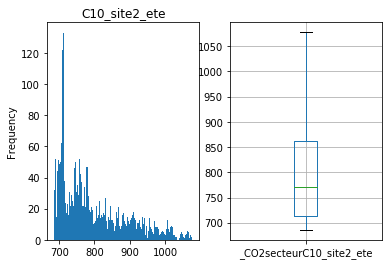

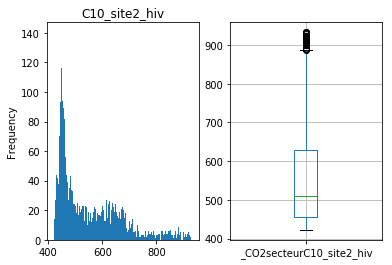

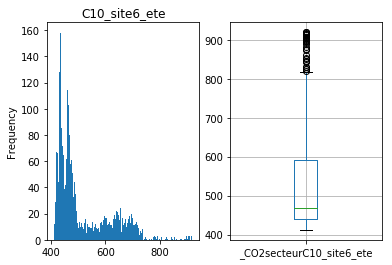

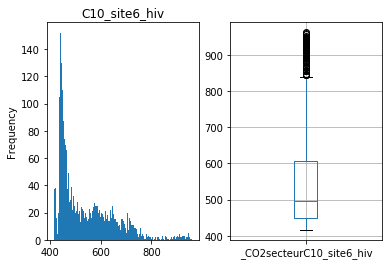

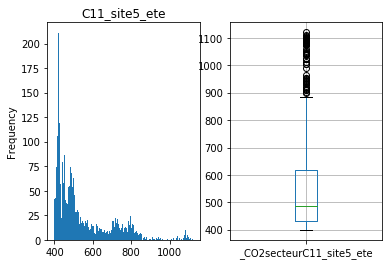

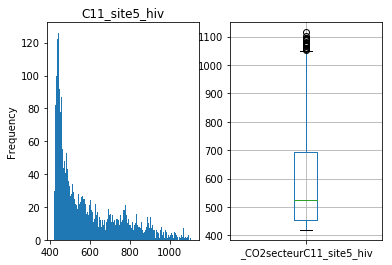

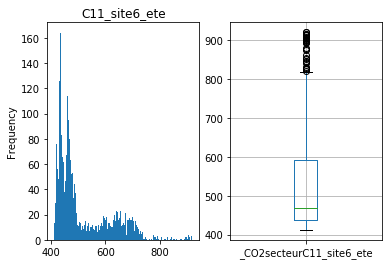

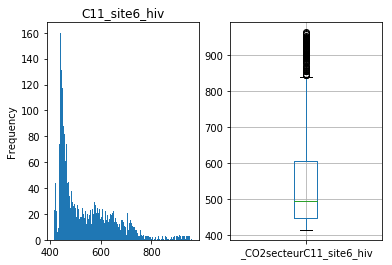

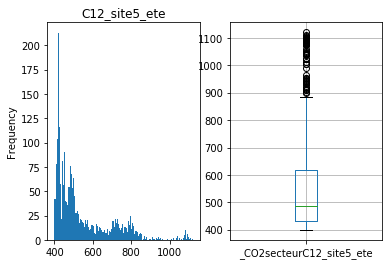

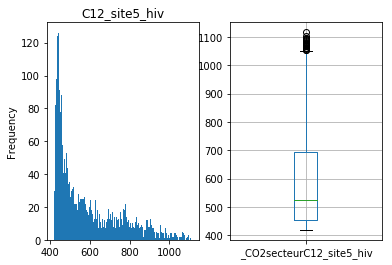

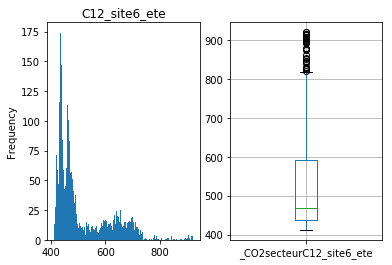

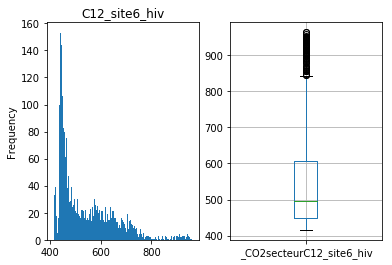

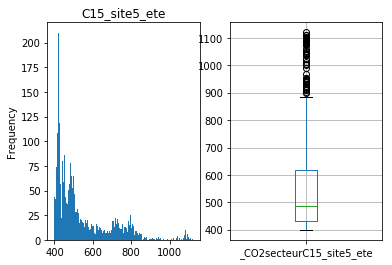

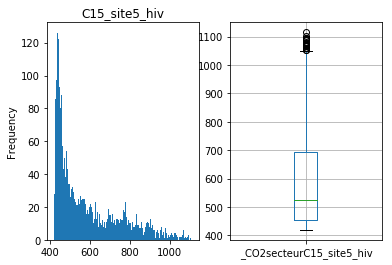

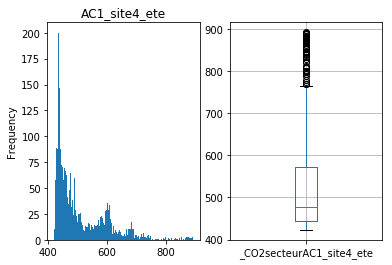

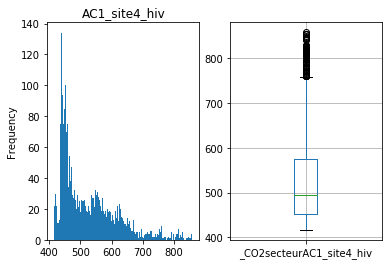

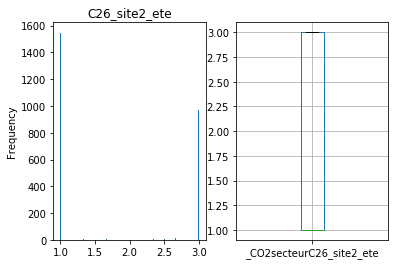

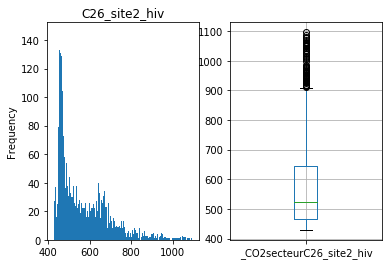

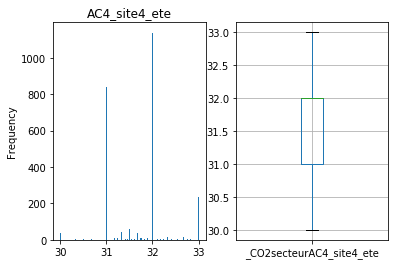

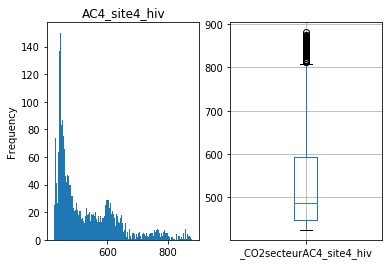

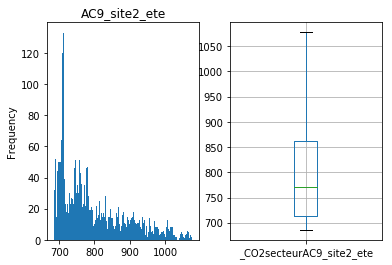

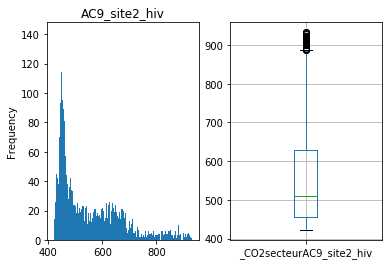

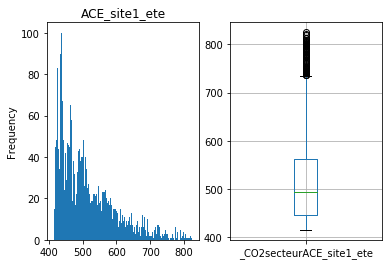

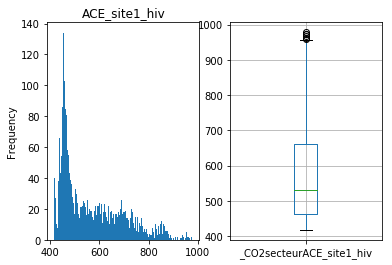

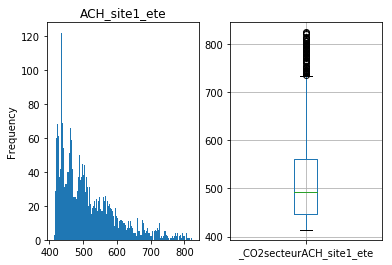

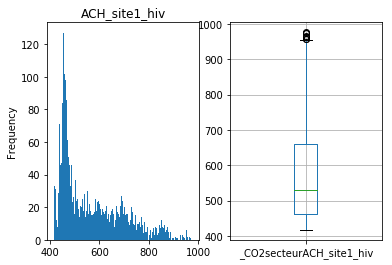

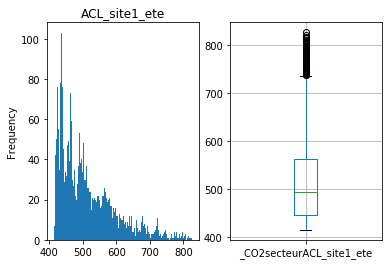

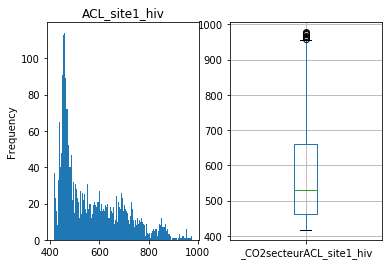

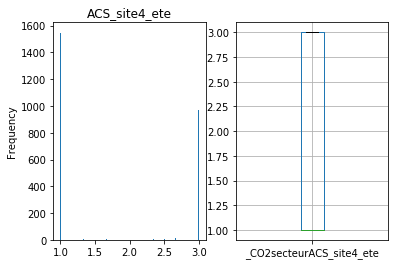

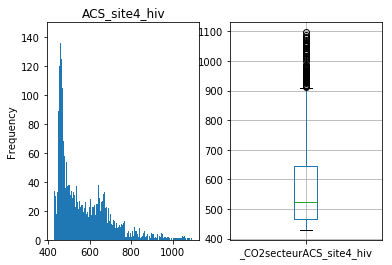

In [8]:
for i in range(len(list_df_finale)):
    plt.subplot(1, 2, 1)
    list_df_finale[i].iloc[:,2].plot(kind='hist',bins=150)
    plt.title(list_df_finale[i].iloc[0,-1])
    
    plt.subplot(1, 2, 2)
    list_df_finale[i].boxplot(column=list_df_finale[i].columns[2], return_type='axes')
    plt.show()

Sonde Tamb

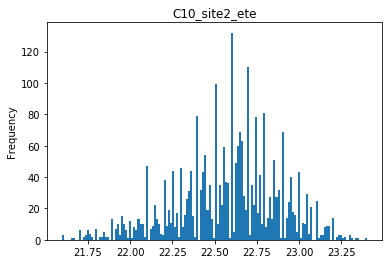

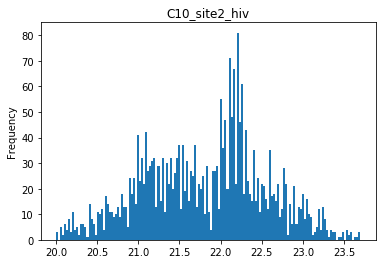

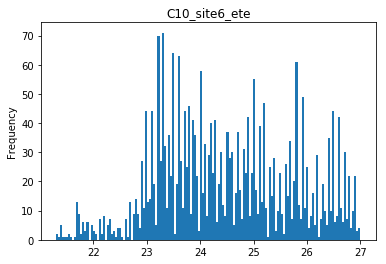

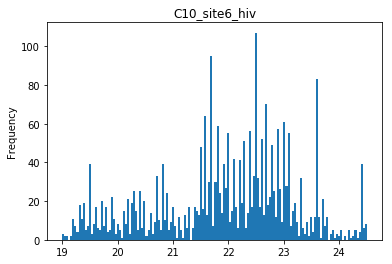

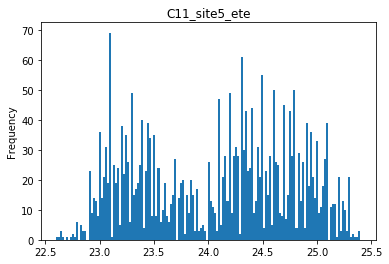

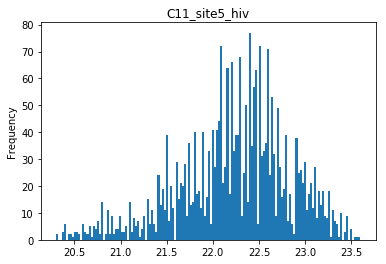

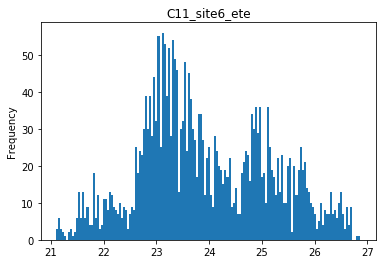

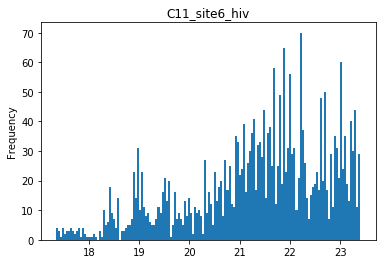

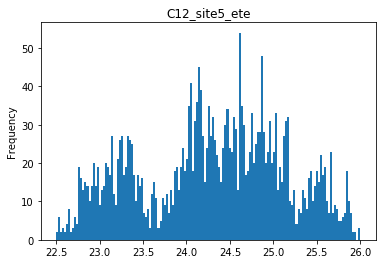

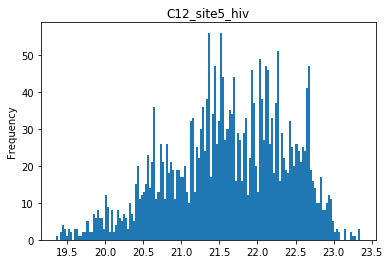

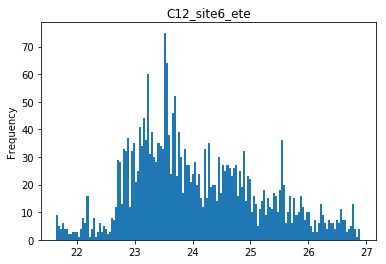

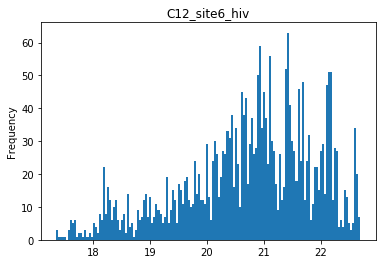

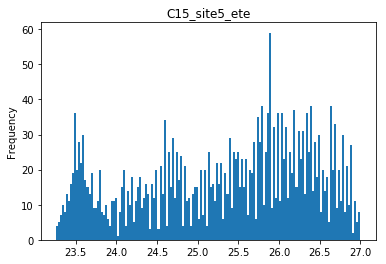

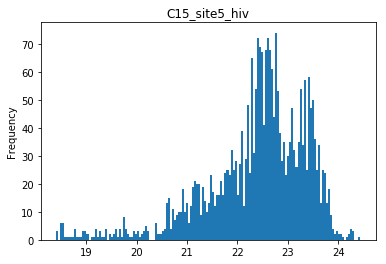

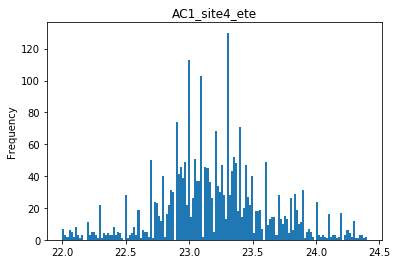

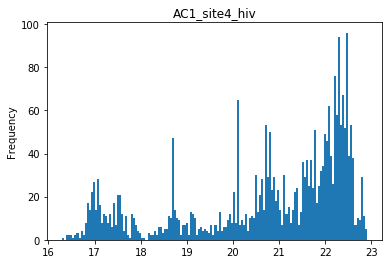

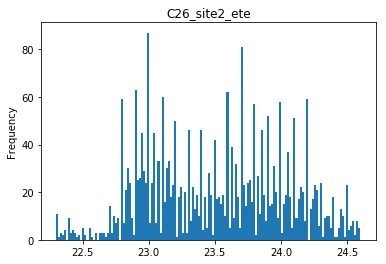

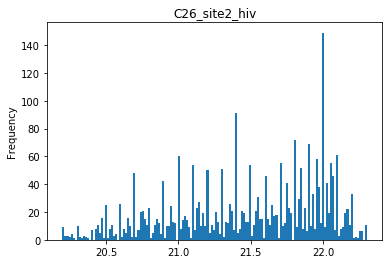

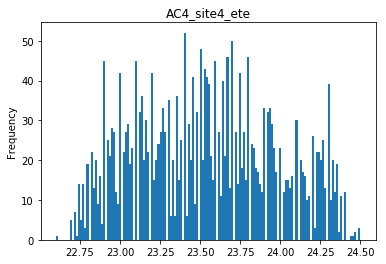

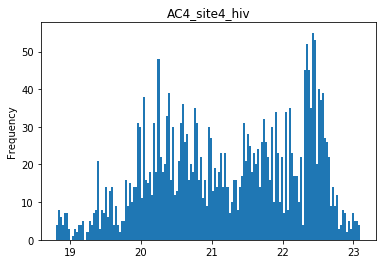

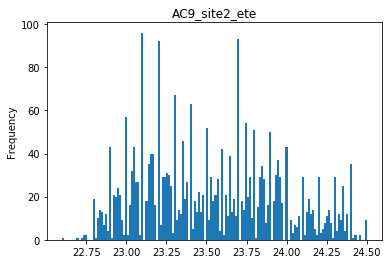

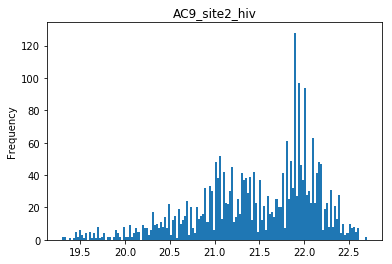

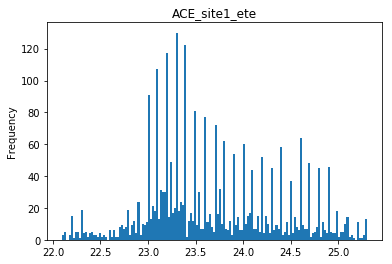

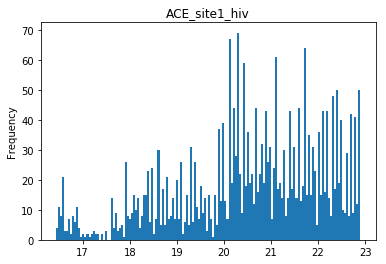

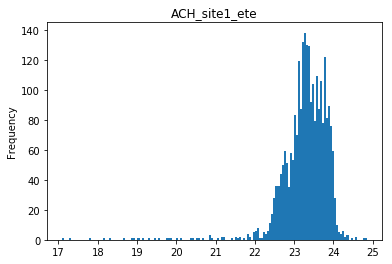

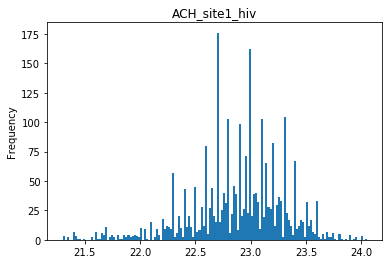

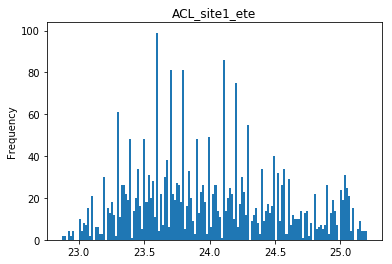

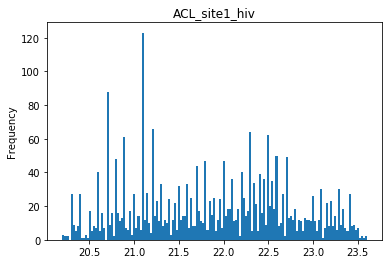

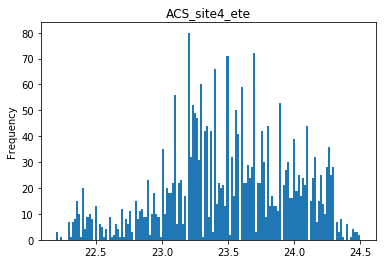

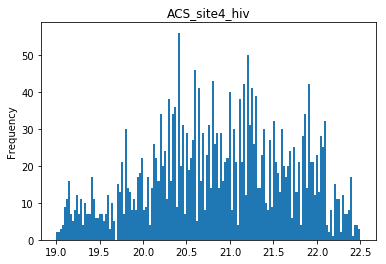

In [9]:
for i in range(len(list_df_finale)):
    list_df_finale[i].iloc[:,0].plot(kind='hist',bins=150)
    plt.title(list_df_finale[i].iloc[0,-1])
    plt.show()

Sonde Talim

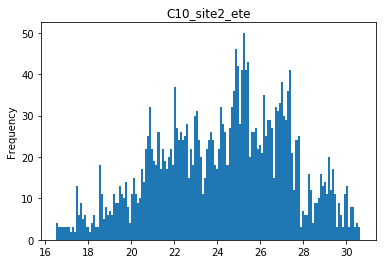

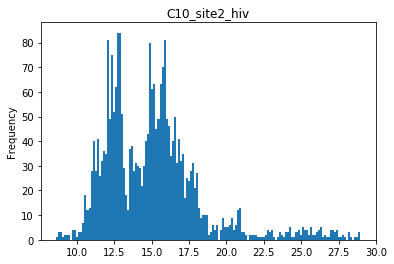

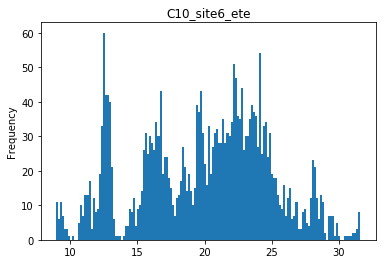

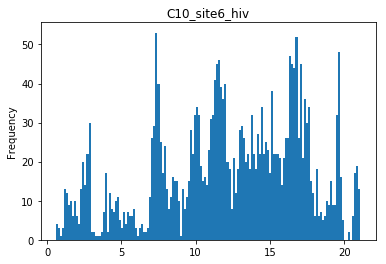

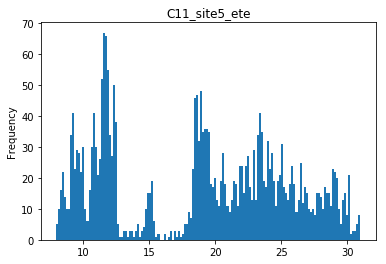

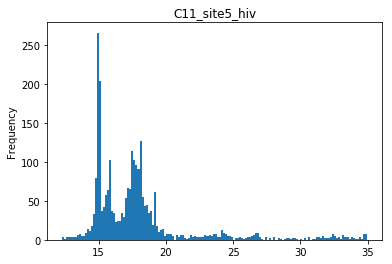

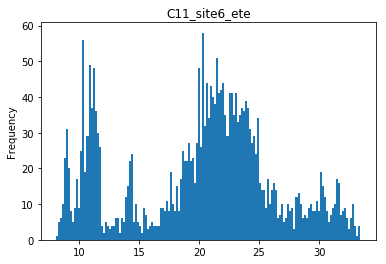

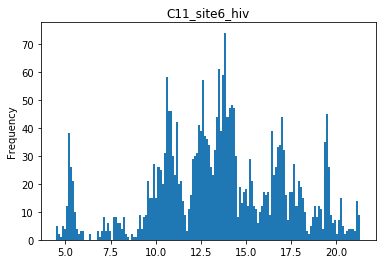

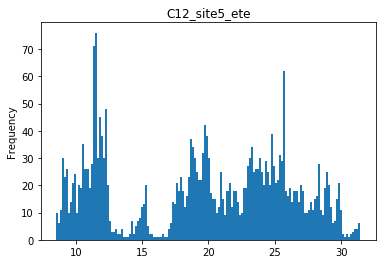

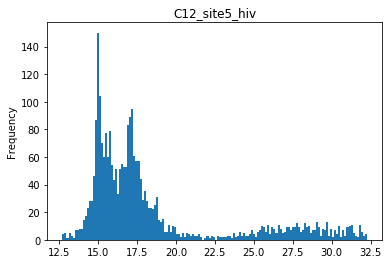

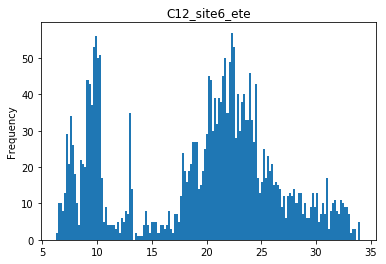

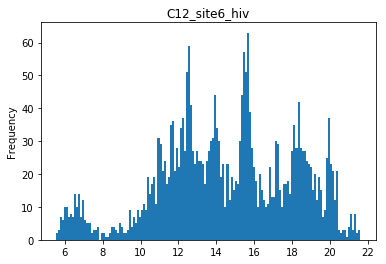

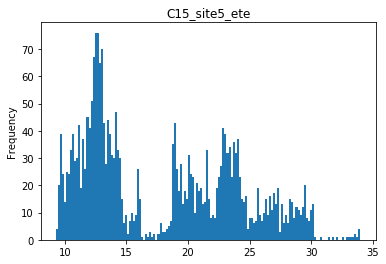

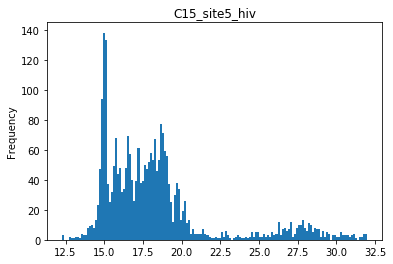

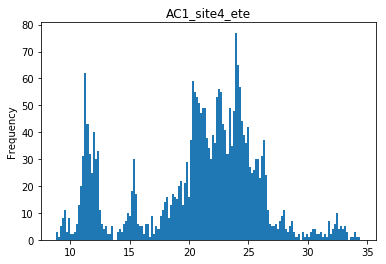

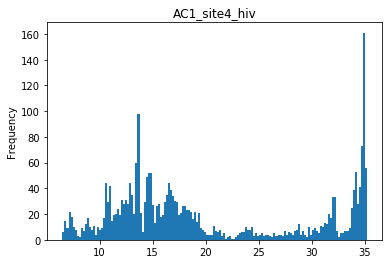

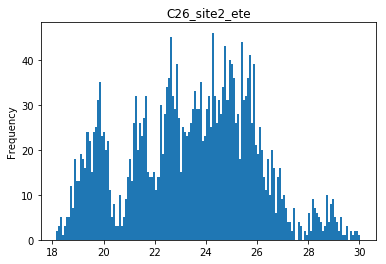

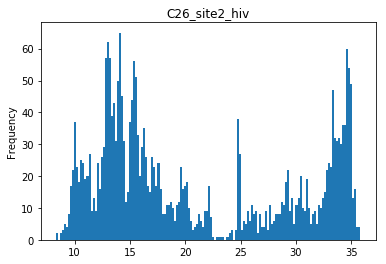

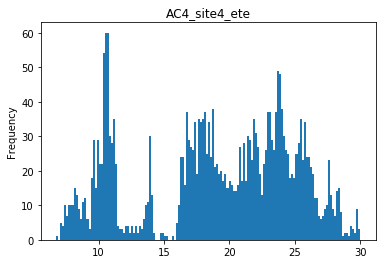

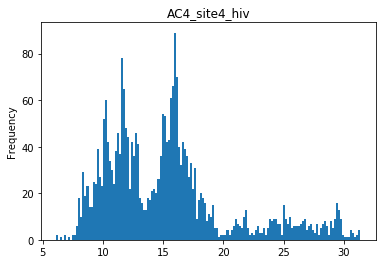

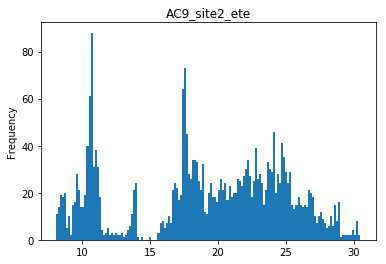

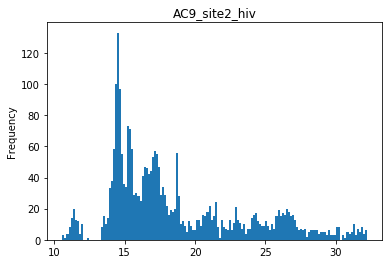

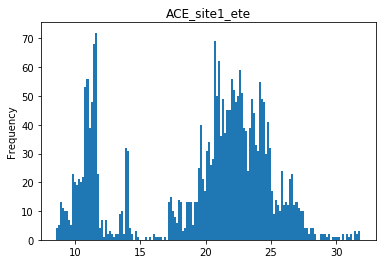

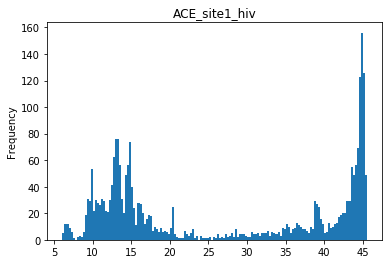

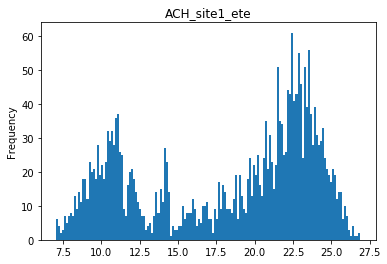

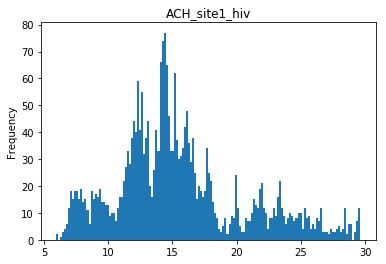

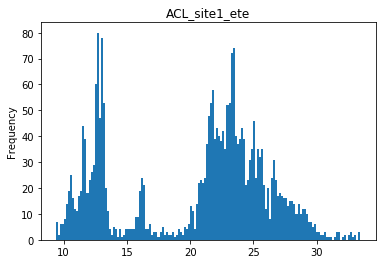

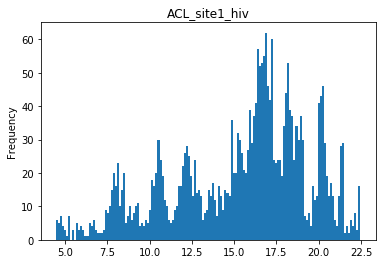

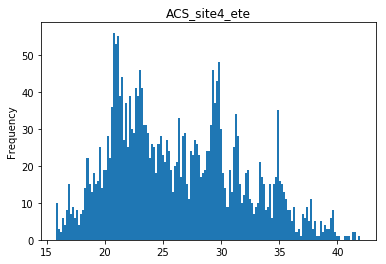

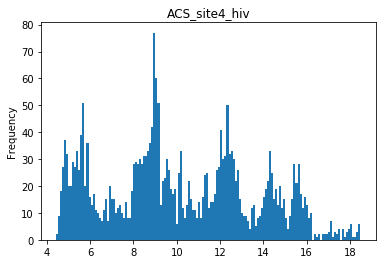

Date
2018-01-06 00:00:00    5.200000
2018-01-06 00:05:00    5.133333
2018-01-06 00:10:00    5.175000
2018-01-06 00:15:00    5.150000
2018-01-06 00:20:00    5.150000
2018-01-06 00:25:00    5.125000
2018-01-06 00:30:00    5.100000
2018-01-06 00:35:00    5.325000
2018-01-06 00:40:00    5.200000
2018-01-06 00:45:00    5.233333
2018-01-06 00:50:00    5.300000
2018-01-06 00:55:00    5.320000
2018-01-06 01:00:00    5.233333
2018-01-06 01:05:00    5.325000
2018-01-06 01:10:00    5.500000
2018-01-06 01:15:00    5.450000
2018-01-06 01:20:00    5.500000
2018-01-06 01:25:00    5.625000
2018-01-06 01:30:00    5.566667
2018-01-06 01:35:00    5.800000
2018-01-06 01:40:00    5.700000
2018-01-06 01:45:00    5.700000
2018-01-06 01:50:00    5.833333
2018-01-06 01:55:00    5.750000
2018-01-06 02:00:00    5.675000
2018-01-06 02:05:00    5.660000
2018-01-06 02:10:00    5.900000
2018-01-06 02:15:00    5.875000
2018-01-06 02:20:00    5.720000
2018-01-06 02:25:00    5.600000
                         ...   
201

In [11]:
for i in range(len(list_df_finale)):
    list_df_finale[i].iloc[:,1].plot(kind='hist',bins=150)
    plt.title(list_df_finale[i].iloc[0,-1])
    plt.show()

HIVER

Tamb nuit

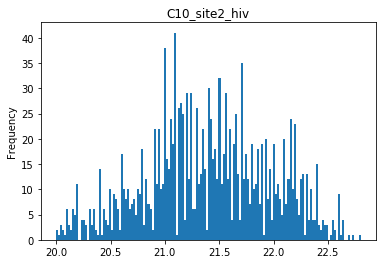

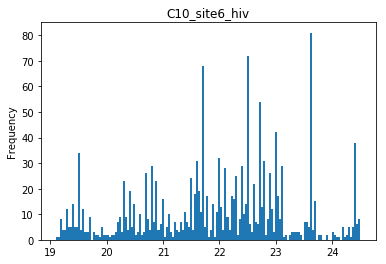

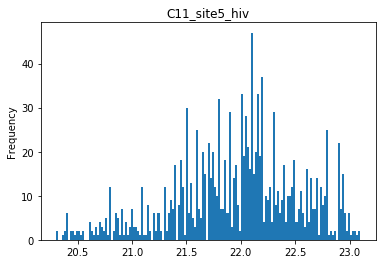

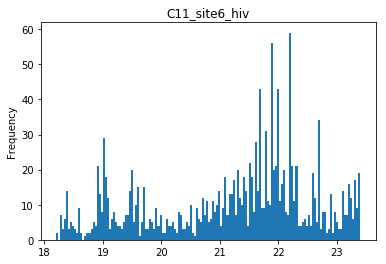

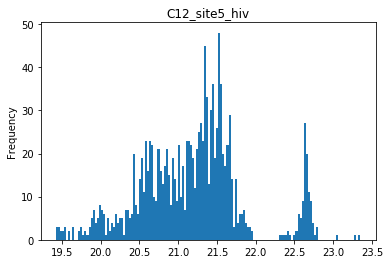

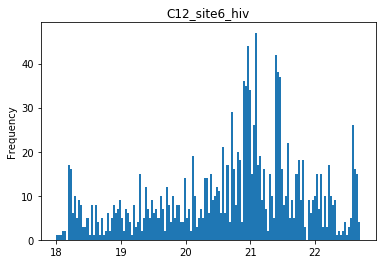

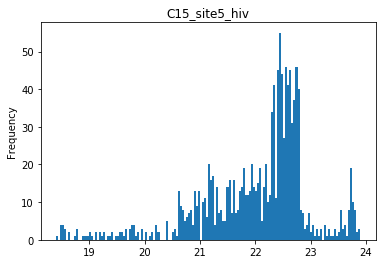

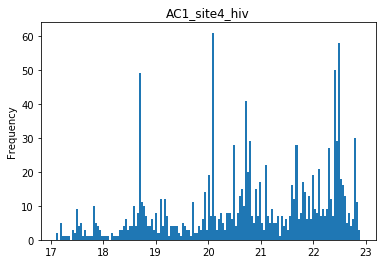

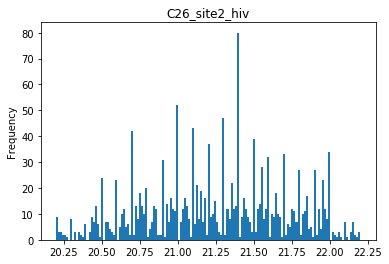

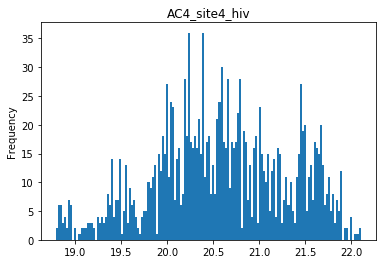

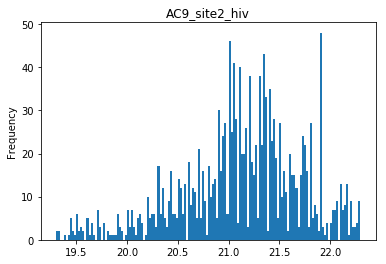

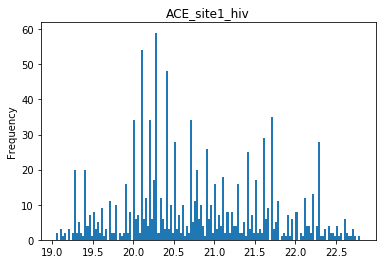

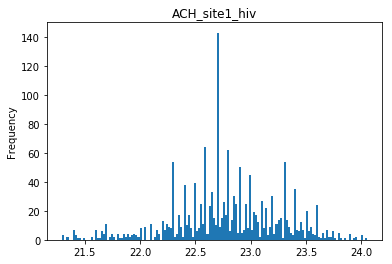

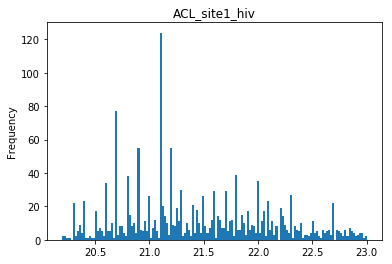

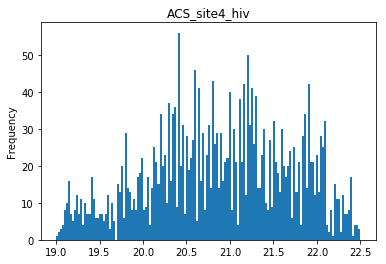

In [12]:
for i in range(len(list_df_finale_hiv)):
    mask_Unite_OFF = list_df_finale_hiv[i]['Mode_Unite']==3.
    list_df_finale_hiv[i][mask_Unite_OFF]['Tamb'].plot(kind='hist',bins=150)
    plt.title(list_df_finale_hiv[i].iloc[0,-1])
    plt.show()

Mode unite jour

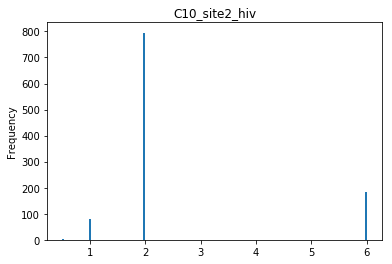

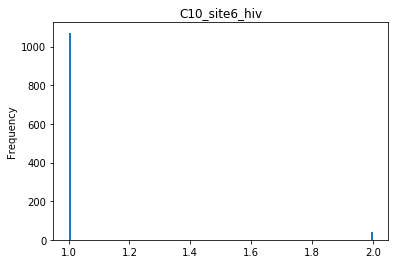

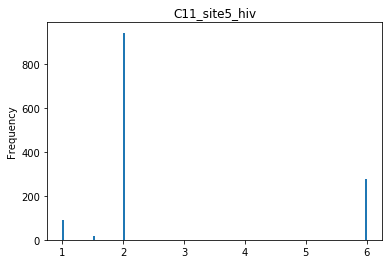

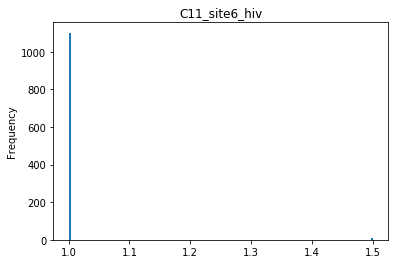

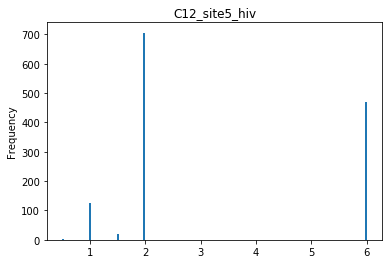

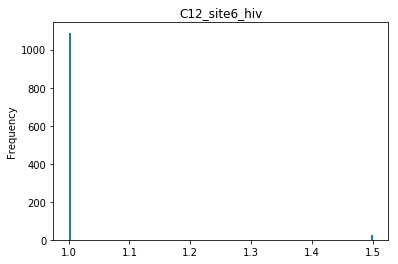

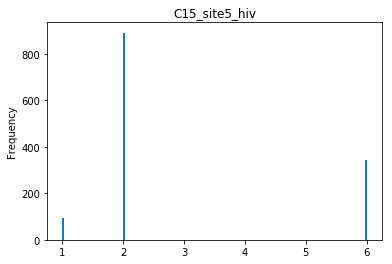

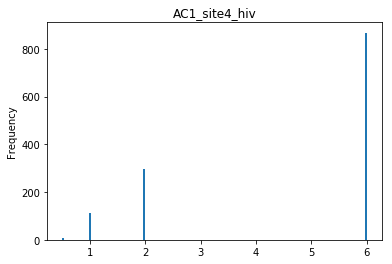

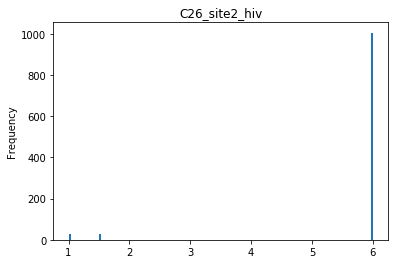

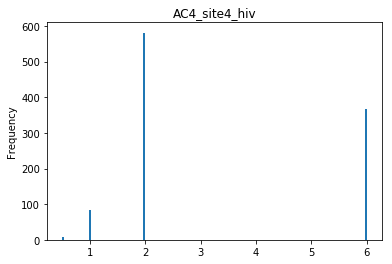

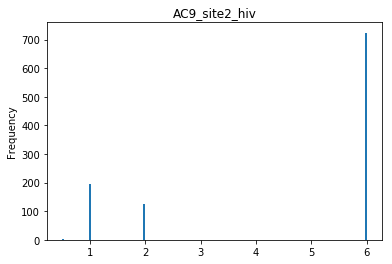

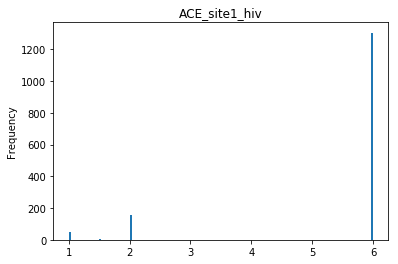

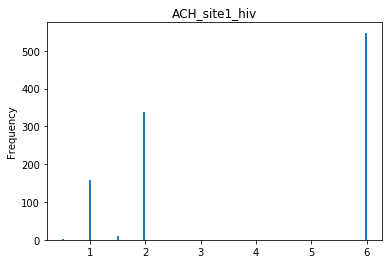

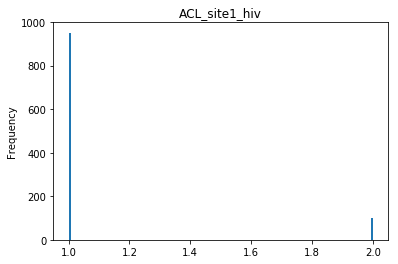

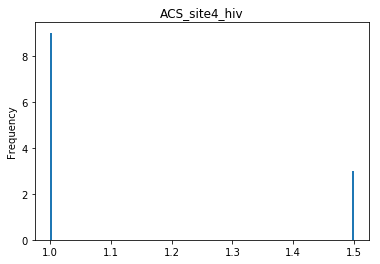

In [14]:
for i in range(len(list_df_finale_hiv)):
    mask_Unite_ON = list_df_finale_hiv[i]['Mode_Unite']!=3.
    list_df_finale_hiv[i][mask_Unite_ON]['Mode_Unite'].plot(kind='hist',bins=150)
    plt.title(list_df_finale_hiv[i].iloc[0,-1])
    plt.show()

dt pour PC

In [156]:
for i in range(len(list_df_finale_hiv)):
    mask_chauff_ON = (list_df_finale_hiv[i].iloc[:,-2]==1.)&(list_df_finale_hiv[i].iloc[:,-4]==6.)| \
                (list_df_finale_hiv[i].iloc[:,-2]==3.)&(list_df_finale_hiv[i].iloc[:,-4]==6.)
    idx_chauff_ON = list_df_finale_hiv[i][mask_chauff_ON].index
    
    for idx_on in idx_chauff_ON:
        delta_hours = pd.Timedelta('2 hours')
        df_temp = list_df_finale_hiv[i][idx_on : idx_on + delta_hours]
        df_temp['delta_PC'] = (df_temp.iloc[:,0]-df_temp.iloc[:,3]).abs()
        min_PC = df_temp['delta_PC'].min()
        idx_dT_PC_0 = df_temp['delta_PC'].idxmin()
    
        col = list_df_finale_hiv[i].columns 
        list_df_finale_hiv[i].loc[idx_dT_PC_0,col[-2]] = 7.

C:\Users\EMaracaja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
for i in range(len(list_df_finale_hiv)):
    print('Unité:',list_df_finale_hiv[i].iloc[0,-1])
    mask_chauff_ON = (list_df_finale_hiv[i].iloc[:,-2]==1.)&(list_df_finale_hiv[i].iloc[:,-4]==6.)| \
                (list_df_finale_hiv[i].iloc[:,-2]==3.)&(list_df_finale_hiv[i].iloc[:,-4]==6.)
    #idx_chauff_ON = list_df_finale[i][mask_chauff_ON].index
    mask_dT_PC_0 = (list_df_finale_hiv[i].iloc[:,-2]==7.)
    
    mask_dt_PC = mask_chauff_ON | mask_dT_PC_0
    x = list_df_finale_hiv[i][mask_dt_PC].iloc[:,-2].index.to_series().diff()
    mask_dt = x < pd.Timedelta('10 hours')
    print(x[mask_dt].mean())
    #print(list_df_finale_hiv[i][mask_dt_PC].iloc[:,-2])

Unité: C10_site2_hiv
0 days 00:49:26.666666
Unité: C10_site6_hiv
NaT
Unité: C11_site5_hiv
0 days 01:15:00
Unité: C11_site6_hiv
NaT
Unité: C12_site5_hiv
0 days 02:24:00
Unité: C12_site6_hiv
0 days 01:00:00
Unité: C15_site5_hiv
0 days 01:26:52.500000
Unité: AC1_site4_hiv
0 days 01:23:07.500000
Unité: C26_site2_hiv
0 days 01:48:30
Unité: AC4_site4_hiv
0 days 01:13:00
Unité: AC9_site2_hiv
0 days 01:09:30
Unité: ACE_site1_hiv
0 days 01:59:00
Unité: ACH_site1_hiv
0 days 01:35:00
Unité: ACL_site1_hiv
0 days 00:15:00
Unité: ACS_site4_hiv
0 days 00:15:00


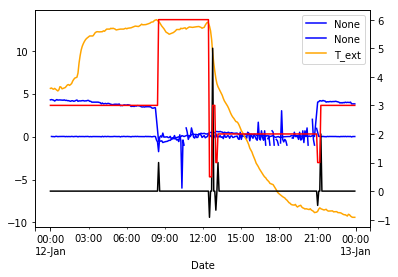

In [119]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
i = 1
date = '2018-01-12'
#col = list_df_finale[5].columns
#list_df_finale[5][[col[0],col[3]]].plot(ax=ax1)
#list_df_finale[5][col[-3]].plot(ax=ax2,color='red')
#plt.show()
(list_df_finale[i][date].iloc[:,0]-list_df_finale[i][date].iloc[:,3]).plot(ax=ax1,color='blue')
(list_df_finale[i][date].iloc[:,0]-list_df_finale[i][date].iloc[:,3]).pct_change().plot(ax=ax1,color='blue')
(list_df_finale[i][date]['T_ext']).plot(ax=ax1,color='orange')

(list_df_finale[i][date].iloc[:,-2]).plot(ax=ax2,color='black')
(list_df_finale[i][date].iloc[:,-4]).plot(ax=ax2,color='RED')
ax1.legend()
plt.show()

Temps de marche chauffage

In [184]:
i=1
df_temp = (list_df_finale[i].between_time('5:00', '11:00'))
mask_chauff_ON = ((df_temp.iloc[:,-2]==1.)&(df_temp.iloc[:,-4]==6.))| \
                ((df_temp.iloc[:,-2]==3.)&(df_temp.iloc[:,-4]==6.))

mask_chauff_OFF =   ((df_temp.iloc[:,-2]==-(6.-1.)/6.)&df_temp.iloc[:,-4]==1.)| \
                    ((df_temp.iloc[:,-2]==-(6.-2.)/6.)&df_temp.iloc[:,-4]==2.)| \
                    ((df_temp.iloc[:,-2]==-(6.-3.)/6.)&df_temp.iloc[:,-4]==3.)

idx_chauff_ON = df_temp[mask_chauff_ON].index
idx_chauff_OFF = df_temp[mask_chauff_OFF].index

#print(idx_chauff_ON)
#print(idx_chauff_OFF)

In [183]:
for i in range(len(list_df_finale_hiv)):
    print('Unité:',list_df_finale_hiv[i].iloc[0,-1])
    df_temp = (list_df_finale_hiv[i].between_time('5:00', '11:00'))
    
    mask_chauff_ON = ((df_temp.iloc[:,-2]==1.)&(df_temp.iloc[:,-4]==6.))| \
                ((df_temp.iloc[:,-2]==3.)&(df_temp.iloc[:,-4]==6.))

    mask_chauff_OFF = ((df_temp.iloc[:,-2]==-(6.-1.)/6.)&df_temp.iloc[:,-4]==1.)| \
                    ((df_temp.iloc[:,-2]==-(6.-2.)/6.)&df_temp.iloc[:,-4]==2.)| \
                    ((df_temp.iloc[:,-2]==-(6.-3.)/6.)&df_temp.iloc[:,-4]==3.)
    
    mask_tamps_chauff = mask_chauff_ON | mask_chauff_OFF
    x = df_temp[mask_tamps_chauff].iloc[:,-2].index.to_series().diff()
    mask_dt = x < pd.Timedelta('10 hours')
    print(x[mask_dt])
    #print(list_df_finale_hiv[i][mask_dt_PC].iloc[:,-2])

Unité: C10_site2_hiv
Date
2018-01-06 09:55:00   00:55:00
2018-01-07 10:10:00   02:10:00
2018-01-08 09:35:00   01:05:00
2018-01-09 09:40:00   01:10:00
2018-01-10 09:45:00   01:15:00
2018-01-11 09:50:00   01:20:00
2018-01-13 09:40:00   00:40:00
2018-01-14 10:20:00   02:20:00
Name: Date, dtype: timedelta64[ns]
Unité: C10_site6_hiv
Series([], Name: Date, dtype: timedelta64[ns])
Unité: C11_site5_hiv
Date
2018-01-06 09:55:00   03:40:00
2018-01-07 09:10:00   03:10:00
2018-01-08 08:20:00   02:05:00
2018-01-09 08:50:00   02:45:00
2018-01-10 08:30:00   02:15:00
2018-01-11 09:45:00   03:40:00
2018-01-13 08:10:00   01:55:00
2018-01-14 09:25:00   03:25:00
Name: Date, dtype: timedelta64[ns]
Unité: C11_site6_hiv
Series([], Name: Date, dtype: timedelta64[ns])
Unité: C12_site5_hiv
Date
2018-01-09 10:15:00   04:00:00
2018-01-10 10:25:00   04:10:00
2018-01-11 09:35:00   03:35:00
2018-01-13 10:55:00   04:40:00
Name: Date, dtype: timedelta64[ns]
Unité: C12_site6_hiv
Series([], Name: Date, dtype: timedelta6

Étude T_ext x Unités pas de chauffage (AN fermé)

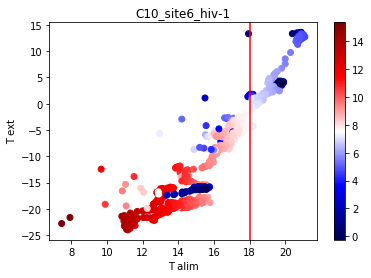

Temp. ext. min. -4.3


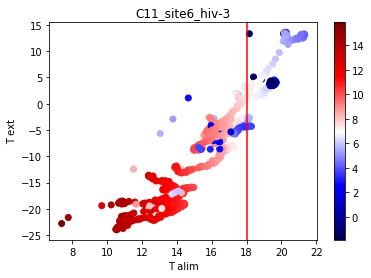

Temp. ext. min. -4.383333333333334


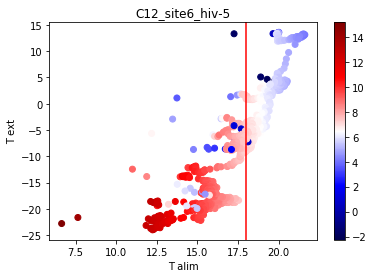

Temp. ext. min. -8.95


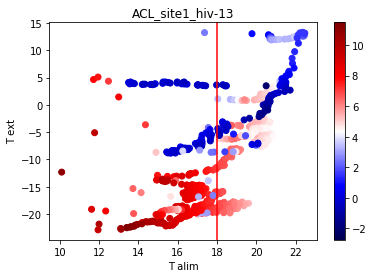

Temp. ext. min. -19.799999


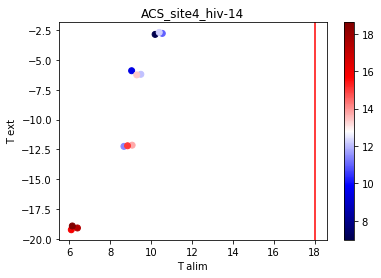

Temp. ext. min. nan


In [323]:
for i in range(len(list_df_finale_hiv)):
    infile = list_df_finale_hiv[i].iloc[0,-1]
    result =  any(elem in infile for elem in list_unites_chauff)
    mask_unite_ON = list_df_finale_hiv[i].iloc[:,-4] != 3. 
    if result== True:
        temp_alim_min = 18.
        
        delta_PC = list_df_finale_hiv[i][mask_unite_ON].iloc[:,4]-list_df_finale_hiv[i][mask_unite_ON].iloc[:,1]
        #x = delta_PC.values.astype(float)
        #x=x.reshape(-1, 1)
        
        #min_max_scaler = preprocessing.MinMaxScaler()
        #x_scaled = min_max_scaler.fit_transform(x)
        #df_normalized = pd.DataFrame(x_scaled)
        
        #color = [str(item/255.) for item in df_normalized.values.reshape(1,-1).tolist()]
        
        fig, ax = plt.subplots()
        scatters = ax.scatter(list_df_finale_hiv[i][mask_unite_ON].iloc[:,1],list_df_finale_hiv[0][mask_unite_ON]['T_ext'],c=delta_PC,cmap='seismic')
        plt.axvline(x=temp_alim_min,c='red')
        plt.xlabel('T alim')
        plt.ylabel('T ext')
        plt.title(infile +'-'+ str(i))
        #img1 = ax.imshow(list_df_finale_hiv[i][mask_unite_ON].iloc[:,1])
        #fig.colorbar(img1, ax=ax)
        plt.colorbar(scatters)
        plt.show()
        
        mask_temp_alim = list_df_finale_hiv[i].iloc[:,1]>temp_alim_min
        print('Temp. ext. min.',list_df_finale_hiv[0][mask_temp_alim&mask_unite_ON]['T_ext'].min())
        #print(df_normalized)
    else:
        pass  

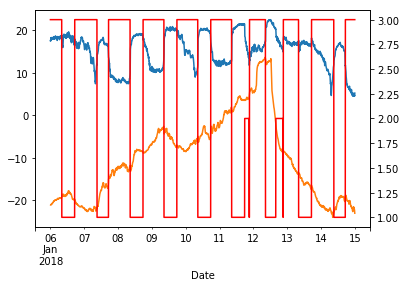

In [230]:
fig,ax1=plt.subplots()
ax2=plt.twinx(ax1)
list_df_finale_hiv[13].iloc[:,1].plot(ax=ax1)
list_df_finale_hiv[13].iloc[:,-3].plot(ax=ax1)
list_df_finale_hiv[13].iloc[:,-4].plot(ax=ax2,c='red')

In [193]:
for i in range(len(list_df_finale_hiv)):
    print(list_df_finale_hiv[i].iloc[0,-1], i)

C10_site2_hiv 0
C10_site6_hiv 1
C11_site5_hiv 2
C11_site6_hiv 3
C12_site5_hiv 4
C12_site6_hiv 5
C15_site5_hiv 6
AC1_site4_hiv 7
C26_site2_hiv 8
AC4_site4_hiv 9
AC9_site2_hiv 10
ACE_site1_hiv 11
ACH_site1_hiv 12
ACL_site1_hiv 13
ACS_site4_hiv 14


ÉTÉ

In [ ]:
Tamb nuit

In [ ]:
for i in range(len(list_df_finale_ete)):
    mask_Unite_OFF = list_df_finale_ete[i]['Mode_Unite']==3.
    list_df_finale_ete[i][mask_Unite_OFF]['Tamb'].plot(kind='hist',bins=150)
    plt.title(list_df_finale_ete[i].iloc[0,-1])
    plt.show()

In [ ]:
Mode unité jour

In [ ]:
for i in range(len(list_df_finale_ete)):
    mask_Unite_ON = list_df_finale_ete[i]['Mode_Unite']!=3.
    list_df_finale_ete[i][mask_Unite_ON]['Mode_Unite'].plot(kind='hist',bins=150)
    plt.title(list_df_finale_ete[i].iloc[0,-1])
    plt.show()

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#list_df_finale[1]['Tamb'].plot(ax=ax1,c='blue')
#list_df_finale[1]['Mode_Unite'].plot(ax=ax2,c='red')
#list_df_finale[1]['CTamb_Act'].plot(ax=ax1,c='black')

#list_df_finale[1]['2018-01-08']['Tamb'].plot(ax=ax1,c='blue')
#list_df_finale[1]['2018-01-08']['Mode_Unite'].plot(ax=ax2,c='red')
#list_df_finale[1]['2018-01-08']['CTamb_Act'].plot(ax=ax1,c='black')

list_df_finale[5]['2018-01-08']['Tamb'].plot(ax=ax1,c='blue')
list_df_finale[5]['2018-01-08']['Mode_Unite'].plot(ax=ax2,c='red')
list_df_finale[5]['2018-01-08']['CTamb_Act'].plot(ax=ax1,c='black')
ax1.legend()

In [ ]:
len(list_df_finale)

In [ ]:
path = '//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Controles/03 Statistiques et suivi/Donnees_Energenia/'
file = 'AC1_site4_hiv.csv'

df = pd.read_csv(path+file, skiprows=1, parse_dates=True)
df = df[1:]

df
#df = pd.read_csv('W:/Emanuel/AC_F.csv', skiprows=1, parse_dates=True)
#df = df[1:]

In [ ]:
df.columns = [w.replace('Objet   : ', '') for w in df.columns]
list_header = [x for x in df.columns if not 'Unnamed' in x]
print(list_header)

list_columns = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]

In [ ]:
list_df = [df.iloc[:,x] for x in list_columns]
list_df

In [ ]:
list_df_clean = []

for df,col in zip(list_df,list_header):
    df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format='%Y-%m-%d %H:%M:%S')
    df.iloc[:,1] = pd.to_numeric(df.iloc[:,1])
    
    df.set_index(df.columns[0], inplace=True)
    df.rename(lambda x: col, axis='columns', inplace=True)
    df.index.names = ['Date']
    
    list_df_clean.append(df.resample('5T').mean())

In [ ]:
df = pd.concat(list_df_clean,axis=1)
df['Mode_Unite'] = df['Mode_Unite'].fillna(method='ffill') 
df = df.apply(lambda x: x.interpolate(), axis=0)

In [ ]:
#df['Mode_Unite'] =df['Mode_Unite'].replace(0, 6)
df['Mode_Unite_change'] = df['Mode_Unite'].pct_change()
df['Mode_Unite'].plot()

mask_dT_PC = (df['Mode_Unite_change']==-3.) 
x = df[mask_dT_PC]['Mode_Unite_change'].index.to_series().diff()
print(x.sort_values())

In [ ]:
mask_Unite_ON = df['Mode_Unite']!=3.

df['delta_PC_Talim'] = df['Talim'] - df['PC_TAlim']
df['delta_PC_Tamb'] = df['Tamb'] - df['CTamb_Act']

#df['delta_PC_Tamb'].plot()
df[mask_Unite_ON]['delta_PC_Tamb'].plot(kind='hist',bins=150)
plt.legend()

In [ ]:
df['Tamb'].plot(kind='hist',bins=150)
plt.legend()
plt.show()
df['Talim'].plot(kind='hist',bins=150)
plt.legend()
plt.show()
df['_CO2secteur'].plot(kind='hist',bins=150)
plt.legend()
plt.show()
df['PC_TAlim'].plot(kind='hist',bins=150)
plt.legend()
plt.show()
df['CTamb_Act'].plot(kind='hist',bins=150)
plt.legend()
plt.show()

In [ ]:
df['Tamb'].between_time('21:00', '7:00').plot(kind='hist',bins=150)
plt.legend()
plt.show()

df['Mode_Unite'].between_time('8:00', '20:00').plot(kind='hist',bins=150)
plt.legend()
plt.show()

# Tests

In [ ]:
list_station = ['5889','5911']
list_df_meteo = []

for station in list_station:
    appended_data = []
    listFichiers = glob.glob("W:/Emanuel/Notebooks/bd/bd_reader/1736 Place du Royaume/station{0}*-hourly.csv".format(station))
    listFichiers.sort()

    for infile in listFichiers:
        data = pd.read_csv(infile,index_col='Date/Time',skiprows=15,parse_dates=True)
        # store DataFrame in list
        appended_data.append(data['Temp (°C)'])
        
    df = pd.concat(appended_data, axis=0)
    
    df.index.names = ['Date']
    df = df.rename('Temp_{0}'.format(station))
    
    list_df_meteo.append(df) 

df_meteo = pd.concat(list_df_meteo,axis=1)
df_meteo = df_meteo.dropna()

In [ ]:
list_RT_chauff = ['//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\ACL_site1_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\AC4_site4_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\ACS_site4_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\AC15_site5_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\AC10_site6_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\AC12_site6_hiv.csv',
'//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\AC11_site6_hiv.csv']

In [ ]:
fichier_T_ext = '//192.168.127.11/Partages_Energenia/ENERGENIA PROJETS/Pur Climat Contrôles/03 Statistiques et suivi/Donnees_Energenia\\T_ext.csv'

df_T_ext = pd.read_csv(fichier_T_ext, skiprows=1, parse_dates=True, engine='python',sep='\t')

df_T_ext = df_T_ext[1:]

df_T_ext.columns = ['Date','T_ext']
df_T_ext['Date'] = pd.to_datetime(df_T_ext['Date'], format='%Y-%m-%d %H:%M:%S')
df_T_ext['T_ext'] = pd.to_numeric(df_T_ext['T_ext'])

df_T_ext = df_T_ext.set_index('Date')
df_T_ext = df_T_ext.resample('5T').mean()
df_T_ext = df_T_ext.apply(lambda x: x.interpolate(), axis=0)

In [ ]:
list_df_finale = []

for infile in list_RT_chauff:
    df = pd.read_csv(infile, skiprows=1, parse_dates=True, engine='python')
    df = df[1:]
    
    df.columns = [w.replace('Objet   : ', '') for w in df.columns]
    list_header = [x for x in df.columns if not 'Unnamed' in x]
    #print(list_header)

    list_columns = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
    
    list_df = [df.iloc[:,x] for x in list_columns]
    
    list_df_clean = []

    for df,col in zip(list_df,list_header):
        df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format='%Y-%m-%d %H:%M:%S')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1])
    
        df.set_index(df.columns[0], inplace=True)
        df.rename(lambda x: col, axis='columns', inplace=True)
        df.index.names = ['Date']
    
        list_df_clean.append(df.resample('5T').mean())
    
    list_df_clean.append(df_T_ext)
    df = pd.concat(list_df_clean,axis=1)
    df['Mode_Unite'] = df['Mode_Unite'].fillna(method='ffill') 
    df = df.apply(lambda x: x.interpolate(), axis=0)
    
    df['Mode_Unite'] =df['Mode_Unite'].replace(0, 6)
    df['Mode_Unite_change'] = df['Mode_Unite'].pct_change()
    
    df['Nom_Fichier'] = infile[-17:-4]
    
    list_df_finale.append(df)

In [ ]:
for i in range(len(list_df_finale)):
    df_plot = list_df_finale[i].between_time('8:00', '18:00')
    df_plot['Talim'].plot(kind='hist',bins=150)
    plt.title(list_df_finale[i].iloc[0,-1])
    plt.show()
    df_plot['Talim'].plot()
    plt.show()
     

In [ ]:
pd.concat([df_meteo['Temp_5911'][df_T_ext.index[0]:df_T_ext.index[-1]],df_T_ext.resample('1H').last()],axis=1).plot()
#df_T_ext

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(len(list_df_finale)):

    if 'site1_hiv' in list_df_finale[i].iloc[0,-1]:
        mask = list_df_finale[i].iloc[:,-3]==3.
        list_df_finale[i][mask].iloc[:,0].plot(kind='hist',bins=150,alpha=0.5)
        #f_plot.iloc[:,0].plot(kind='hist',bins=150,alpha=0.5)
        #list_df_finale[i].iloc[:,0].plot(ax=ax1)
        #list_df_finale[i].iloc[:,-3].plot(ax=ax2)
    plt.legend()


In [ ]:
for i in range(len(list_df_finale)):
    if 'site2_hiv' in list_df_finale[i].iloc[0,-1]:
        list_df_finale[i].iloc[:,0].plot()
        #print(list_df_finale[i].iloc[0,-1])
    plt.legend()

In [ ]:
for i in range(len(list_df_finale)):
    if 'site4_hiv' in list_df_finale[i].iloc[0,-1]:
        list_df_finale[i].iloc[:,0].plot()
        #print(list_df_finale[i].iloc[0,-1])
    plt.legend()

In [ ]:
for i in range(len(list_df_finale)):
    if 'site5_hiv' in list_df_finale[i].iloc[0,-1]:
        list_df_finale[i].iloc[:,0].plot()
        print(list_df_finale[i].iloc[0,-1])
    plt.legend()

In [ ]:
for i in range(len(list_df_finale)):
    
    if 'site6_hiv' in list_df_finale[i].iloc[0,-1]:
        list_df_finale[i].iloc[:,0].plot()
        print(list_df_finale[i].iloc[0,-1])
    plt.legend()

In [ ]:
for i in range(len(list_df_finale)):
    if 'ACH_site1_hiv' in list_df_finale[i].iloc[0,-1]:
        list_df_finale[i].iloc[:,-3].plot()
        print(list_df_finale[i].iloc[0,-1])
    plt.legend()